In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense


****TASK - 1****

In [2]:
from google.colab import files
uploaded=files.upload()

Saving DS3_CS2_SP6_Hackathon_House_Data_HackathonBrief.csv to DS3_CS2_SP6_Hackathon_House_Data_HackathonBrief.csv


In [3]:
import io

data=pd.read_csv(io.BytesIO(uploaded["DS3_CS2_SP6_Hackathon_House_Data_HackathonBrief.csv"]))

In [4]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
final_df=data.copy()

In [6]:
data['AgeWhensold']=data['YrSold'] - data['YearBuilt']
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeWhensold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8


In [7]:
data.drop(data[(data['GrLivArea']>2600) | (data['LotArea']>40000)].index, inplace=True)

In [8]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeWhensold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,8
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,32
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,69
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,60


**Challenge - 1**

In [9]:
data[['GrLivArea', 'SalePrice']].corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.677466
SalePrice,0.677466,1.000000


**TASK - 1**

In [10]:
X = np.array(data['GrLivArea']).reshape(-1, 1)
y = np.array(data['SalePrice']).reshape(-1, 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [12]:

scaler = MinMaxScaler()
scaler.fit(X_train)

# Replace unscaled values with scaled values
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [13]:
# set random seed
tf.random.set_seed(42) # global operator seed

# create a model using the sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# compile a model 
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = ["mae"])

# fitting a model
history = model.fit(X_train, y_train, epochs = 100, validation_data=[X_test, y_test], verbose=0)

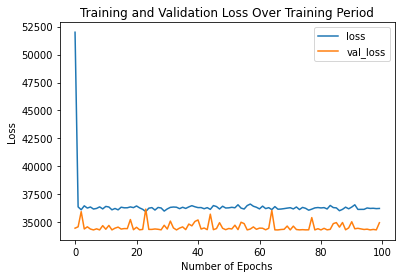

In [14]:
loss_df = pd.DataFrame(history.history)
loss_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period");


In [15]:
pd.DataFrame(history.history)

,loss,mae,val_loss,val_mae
0,51995.964844,51995.964844,34477.039062,34477.039062
1,36380.550781,36380.550781,34600.781250,34600.781250
2,36122.937500,36122.937500,35955.742188,35955.742188
3,36477.425781,36477.425781,34405.937500,34405.937500
4,36275.285156,36275.285156,34599.367188,34599.367188
...,...,...,...,...
95,36284.539062,36284.539062,34389.687500,34389.687500
96,36244.039062,36244.039062,34323.968750,34323.968750
97,36257.207031,36257.207031,34365.078125,34365.078125
98,36226.328125,36226.328125,34327.531250,34327.531250


In [16]:
# evaluate on test data set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"loss on test data: {loss}")
print(f"accuracy on test data: {100*accuracy:.2f}%")

9/9 [==============================] - 0s 2ms/step - loss: 34965.6055 - mae: 34965.6055
loss on test data: 34965.60546875
accuracy on test data: 3496560.55%


In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred

array([[122280.4  ],
       [110634.86 ],
       [135288.72 ],
       [206276.95 ],
       [118687.625],
       [209126.4  ],
       [183853.1  ],
       [ 78052.12 ],
       [106670.414],
       [239726.92 ],
       [265371.88 ],
       [202684.19 ],
       [180384.22 ],
       [110758.74 ],
       [159075.36 ],
       [ 94653.21 ],
       [226470.83 ],
       [219037.5  ],
       [212595.28 ],
       [192773.1  ],
       [232417.48 ],
       [251620.23 ],
       [227709.7  ],
       [ 64424.36 ],
       [195250.86 ],
       [182366.44 ],
       [148668.7  ],
       [145695.38 ],
       [288910.75 ],
       [132934.83 ],
       [244930.25 ],
       [106298.75 ],
       [118315.96 ],
       [146562.6  ],
       [103201.53 ],
       [316537.94 ],
       [148420.92 ],
       [210117.52 ],
       [194879.2  ],
       [173694.22 ],
       [180384.22 ],
       [178402.   ],
       [168862.56 ],
       [182366.44 ],
       [206648.62 ],
       [174933.11 ],
       [243319.69 ],
       [17914

In [19]:
# visualize the preciction
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  #plt.figure(figsize = (10, 5))
  plt.scatter(train_data, train_labels, color = 'red', label = 'Training data')
  plt.scatter(test_data, test_labels, color = 'green', label = 'Testing data')
  plt.scatter(test_data, predictions, color = 'orange', label = 'predictions')
  plt.legend();



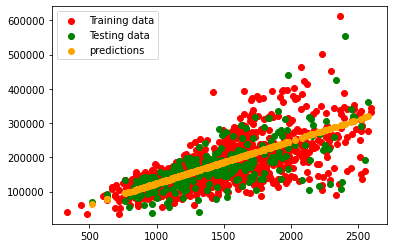

In [20]:
plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred)

**Challenge - 2**

**TASK - 3**

In [21]:
df=data[['LotFrontage','GrLivArea','GarageArea','LotArea','AgeWhensold','SalePrice']]

In [22]:
df1=df.dropna()

In [23]:
X1=df1.drop('SalePrice', axis = 1)
Y1=df1[['SalePrice']]

In [24]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = 0.2, random_state=42)

In [25]:
scaler = MinMaxScaler()
scaler.fit(X_train1)

# Replace unscaled values with scaled values
x_train = scaler.transform(X_train1)
x_test = scaler.transform(X_test1)

In [26]:
# set random seed
tf.random.set_seed(42) # global operator seed

# create a model using the sequential API
model1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# compile a model 
model1.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = ["mae"])

# fitting a model
history1 = model1.fit(X_train1, y_train1, epochs = 100, validation_data=[X_test1, y_test1], verbose=0)

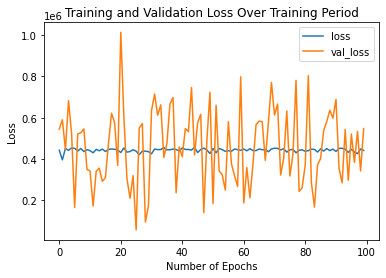

In [27]:
loss_df = pd.DataFrame(history1.history)
loss_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period");

In [28]:
pd.DataFrame(history1.history) 

,loss,mae,val_loss,val_mae
0,442284.65625,442284.65625,544696.50000,544696.50000
1,395888.75000,395888.75000,590092.62500,590092.62500
2,451672.50000,451672.50000,445790.46875,445790.46875
3,441534.71875,441534.71875,682952.75000,682952.75000
4,453996.62500,453996.62500,523396.71875,523396.71875
...,...,...,...,...
95,447242.93750,447242.93750,520929.00000,520929.00000
96,433533.21875,433533.21875,384140.71875,384140.71875
97,425814.50000,425814.50000,533944.75000,533944.75000
98,448574.21875,448574.21875,342002.59375,342002.59375


In [29]:
# evaluate on test data set
loss, accuracy = model1.evaluate(X_test1, y_test1)
print(f"loss on test data: {loss}")
print(f"accuracy on test data: {100*accuracy:.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 547771.3750 - mae: 547771.3750
loss on test data: 547771.375
accuracy on test data: 54777137.50%


In [30]:
y_pred1 = model1.predict(X_test1)

In [31]:
y_pred1   

array([[ -488312.9  ],
       [ -316084.3  ],
       [ -382490.38 ],
       [ -668798.56 ],
       [ -282610.6  ],
       [ -380474.38 ],
       [ -352846.97 ],
       [ -603334.9  ],
       [ -373889.4  ],
       [ -363322.7  ],
       [ -252227.08 ],
       [ -365306.1  ],
       [ -435799.84 ],
       [ -585731.94 ],
       [   -4214.504],
       [ -362823.8  ],
       [ -283877.72 ],
       [ -322110.97 ],
       [ -344438.25 ],
       [ -354595.2  ],
       [ -377696.8  ],
       [ -224032.47 ],
       [ -482575.47 ],
       [   11597.425],
       [ -586272.   ],
       [ -500476.44 ],
       [ -512979.03 ],
       [ -311968.16 ],
       [ -334175.25 ],
       [ -726179.75 ],
       [ -489035.78 ],
       [ -602563.06 ],
       [ -303510.78 ],
       [ -474915.78 ],
       [ -234586.95 ],
       [ -525612.94 ],
       [   -5299.082],
       [  -84238.46 ],
       [ -353049.38 ],
       [ -394593.6  ],
       [  -10192.869],
       [ -251110.25 ],
       [ -150325.45 ],
       [ -4

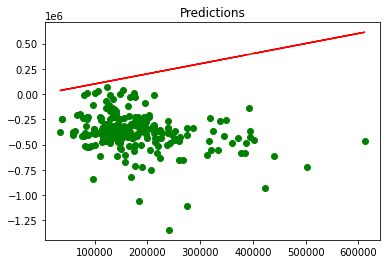

In [32]:
# Visualizing Our predictions
#fig = plt.figure(figsize=(10,5))
plt.scatter(y_test1,y_pred1, color = 'green')
plt.title("Predictions")
# Perfect predictions
plt.plot(y_test1,y_test1,'r')
plt.show()

**Challenge - 3** 

**TASK - 4**

In [33]:
tf.random.set_seed(42)

# create teh model
model2 = tf.keras.Sequential([tf.keras.layers.Dense(1, activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(1, activation = tf.keras.activations.relu), 
                               tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)])

# change the loss and metrics of our compile model:
model2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# fit the model;
history2 = model2.fit(X_train1, y_train1, epochs = 100,validation_data=[X_test1, y_test1], verbose=0)

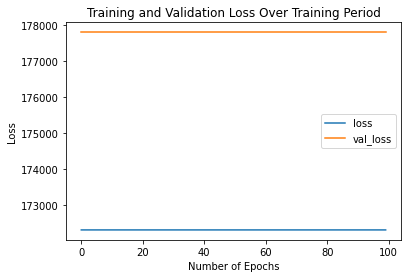

In [34]:
loss_df = pd.DataFrame(history2.history)
loss_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period");

In [35]:
pd.DataFrame(history2.history)

,loss,mae,val_loss,val_mae
0,172320.187500,172320.187500,177807.84375,177807.84375
1,172320.187500,172320.187500,177807.84375,177807.84375
2,172320.171875,172320.171875,177807.84375,177807.84375
3,172320.187500,172320.187500,177807.84375,177807.84375
4,172320.171875,172320.171875,177807.84375,177807.84375
...,...,...,...,...
95,172320.187500,172320.187500,177807.84375,177807.84375
96,172320.171875,172320.171875,177807.84375,177807.84375
97,172320.187500,172320.187500,177807.84375,177807.84375
98,172320.187500,172320.187500,177807.84375,177807.84375


In [36]:
# evaluate on test data set
loss, accuracy = model2.evaluate(X_test1, y_test1)
print(f"loss on test data: {loss}")
print(f"accuracy on test data: {100*accuracy:.2f}%")

8/8 [==============================] - 0s 2ms/step - loss: 177807.8438 - mae: 177807.8438
loss on test data: 177807.84375
accuracy on test data: 17780784.38%


In [37]:
y_pred2 = model2.predict(X_test1)

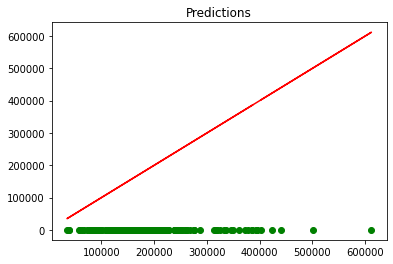

In [38]:
# Visualizing Our predictions
#fig = plt.figure(figsize=(10,5))
plt.scatter(y_test1,y_pred2, color = 'green')
plt.title("Predictions")
# Perfect predictions
plt.plot(y_test1,y_test1,'r')
plt.show()

In [39]:
# Define model
model3 = Sequential()
model3.add(Dense(500, input_dim=5, activation= "relu"))
model3.add(Dense(100, activation= "relu"))
model3.add(Dense(50, activation= "relu"))
model3.add(Dense(1))
#model.summary() #Print model Summary

In [40]:
model3.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model3.fit(X_train1, y_train1, epochs=20)

Epoch 1/20
29/29 [==============================] - 1s 3ms/step - loss: 29785307136.0000 - mean_squared_error: 29785307136.0000
Epoch 2/20
29/29 [==============================] - 0s 2ms/step - loss: 10377716736.0000 - mean_squared_error: 10377716736.0000
Epoch 3/20
29/29 [==============================] - 0s 2ms/step - loss: 5338152448.0000 - mean_squared_error: 5338152448.0000
Epoch 4/20
29/29 [==============================] - 0s 3ms/step - loss: 4684809216.0000 - mean_squared_error: 4684809216.0000
Epoch 5/20
29/29 [==============================] - 0s 3ms/step - loss: 4309917696.0000 - mean_squared_error: 4309917696.0000
Epoch 6/20
29/29 [==============================] - 0s 3ms/step - loss: 3864864768.0000 - mean_squared_error: 3864864768.0000
Epoch 7/20
29/29 [==============================] - 0s 2ms/step - loss: 3493919744.0000 - mean_squared_error: 3493919744.0000
Epoch 8/20
29/29 [==============================] - 0s 3ms/step - loss: 3047741952.0000 - mean_squared_error: 3047

In [41]:
from sklearn.metrics import mean_squared_error
pred_train= model3.predict(X_train1)
print(np.sqrt(mean_squared_error(y_train1,pred_train)))

pred= model3.predict(X_test1)
print(np.sqrt(mean_squared_error(y_test1,pred))) 

40281.078543385505
51348.03381274511


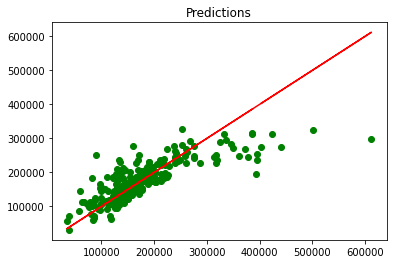

In [42]:
# Visualizing Our predictions
#fig = plt.figure(figsize=(10,5))
plt.scatter(y_test1,pred, color = 'green')         
plt.title("Predictions")
# Perfect predictions
plt.plot(y_test1,y_test1,'r')
plt.show()

**Challenge - 4**

**TASK - 5**

In [43]:
## building binary class (as NewBath)
final_df['NewBath'] = np.array(list(map(lambda x : 0 if x <=1 else 1 , final_df['FullBath'])))
final_df['NewBath'].value_counts()

1    801
0    659
Name: NewBath, dtype: int64

In [44]:
new_df = final_df[['GrLivArea','NewBath']]

# Build a train and test dataset

X_train, X_test, y_train, y_test = train_test_split(new_df['GrLivArea'], new_df['NewBath'], test_size=0.25)

## set random seed
tf.random.set_seed(42)

## create the model
## Combination of linear and non-linear activation function
model_5= tf.keras.Sequential([
          tf.keras.layers.Dense(4, input_shape = [1], activation ='relu'),
          tf.keras.layers.Dense(1,activation ='sigmoid')
])

## compile the model
model_5.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])
## fit the model
model5 = model_5.fit(X_train,y_train,epochs = 100, verbose = 0)

## Evaluate
model_5.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.5375 - accuracy: 0.7973


[0.5374982357025146, 0.7972602844238281]

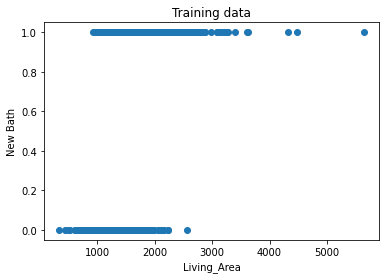

In [45]:
plt.figure()
plt.scatter(X_train, y_train)
plt.xlabel('Living_Area')
plt.ylabel('New Bath')
plt.title('Training data');

In [46]:
prediction_5 = model_5.predict(X_test)
prediction_5

array([[0.6706081 ],
       [0.46794257],
       [0.4361524 ],
       [0.6464013 ],
       [0.55465066],
       [0.6826889 ],
       [0.6757711 ],
       [0.6106446 ],
       [0.83583885],
       [0.3834546 ],
       [0.70554316],
       [0.8569868 ],
       [0.6514334 ],
       [0.9578181 ],
       [0.63942903],
       [0.4975792 ],
       [0.7528818 ],
       [0.5148311 ],
       [0.7859039 ],
       [0.6197946 ],
       [0.6576762 ],
       [0.6457699 ],
       [0.77790034],
       [0.45593378],
       [0.5491883 ],
       [0.6892312 ],
       [0.6311128 ],
       [0.39098838],
       [0.6400654 ],
       [0.8779021 ],
       [0.61031634],
       [0.54268634],
       [0.67848754],
       [0.40720904],
       [0.91124076],
       [0.59710634],
       [0.3358183 ],
       [0.3743582 ],
       [0.6790894 ],
       [0.5051718 ],
       [0.5957771 ],
       [0.5265447 ],
       [0.74796957],
       [0.52516794],
       [0.43309936],
       [0.54302895],
       [0.9603105 ],
       [0.720

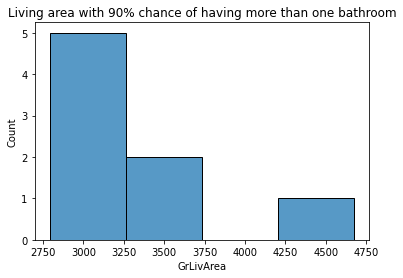

In [47]:
# living area with 90% chances of having more than one bathroom
sns.histplot(X_test[np.squeeze(prediction_5>= 0.90)])
plt.title('Living area with 90% chance of having more than one bathroom');

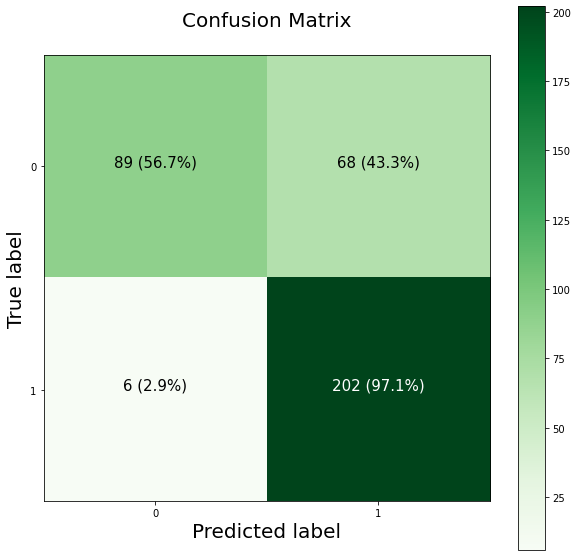

In [48]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
import itertools

figsize=(10,10)

## create confusion matrix
cm = confusion_matrix(y_test,tf.round(prediction_5))
cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis] ## normalize it
n_classes = cm.shape[0]

## prettify it
fig,ax = plt.subplots(figsize=figsize)
## create a matrix plot
cax = ax.matshow(cm,cmap=plt.cm.Greens)
fig.colorbar(cax)

## create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

## label the axis
ax.set(title='Confusion Matrix',
       xlabel='Predicted label',
       ylabel='True label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

## set x-axis labels to bottom
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

## adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

## set threshold for different colors
threshold = (cm.max()+cm.min())/2.

## plot the text on each cell
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',
           horizontalalignment = 'center',
           color = 'white' if cm[i,j]>threshold else 'black',
           size = 15)

In [49]:
confusion_matrix(y_test,tf.round(prediction_5))

array([[ 89,  68],
       [  6, 202]])

In [50]:
pd.DataFrame(np.array(X_test))
lr_prob=model_5.predict(X_test)
final_df.loc[np.where(lr_prob[:,0]>0.50)]['GrLivArea']

0      1710
3      1717
4      2198
5      1362
6      1694
       ... 
353     720
355    1200
360     912
363     987
364    1574
Name: GrLivArea, Length: 270, dtype: int64

In [51]:
ns_probs = [0 for _ in range(len(y_test))]

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_prob[:,0])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.873


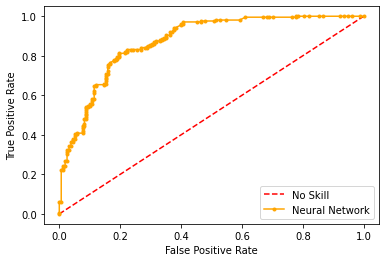

In [53]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_prob)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.plot(ns_fpr, ns_tpr, color='red', linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr,color='orange', marker='.', label='Neural Network')

plt.legend()
plt.show()

##Challenge- 5

**TASK - 6**

In [54]:
final_df['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [55]:
df_1 = final_df[['YearBuilt','LotArea','GarageCars']].copy()
df_1 = df_1[(df_1.GarageCars < 4) & (df_1.GarageCars > 0)]
df_1.shape, final_df.shape

((1374, 3), (1460, 82))

In [56]:
X_train,X_test,y_train,y_test = train_test_split(df_1[['YearBuilt','LotArea']],df_1['GarageCars'],test_size = 0.20,random_state=42)

In [57]:
## set random seed
tf.random.set_seed(42)

## create the model
## Combination of linear and non-linear activation function
model_6 = tf.keras.Sequential([                     
          tf.keras.layers.Dense(6,activation ='relu'),
          tf.keras.layers.Dense(3,activation ='relu'),
          tf.keras.layers.Dense(4,activation ='softmax')]) ## output shape is 4

## compile the model
model_6.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), ## different loss function
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
## fit the model
model6 = model_6.fit(X_train,
                                 y_train,
                                 epochs = 10,
                                 verbose = 0,
                                 validation_data=(X_test,y_test))

prediction_6 = model_6.predict(X_test)
prediction6_fin = prediction_6.argmax(axis = 1)
prediction6_fin

array([1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1])

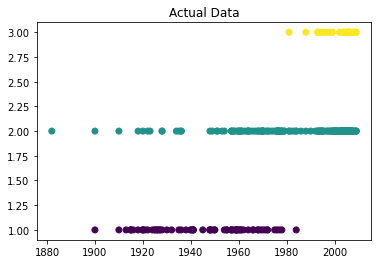

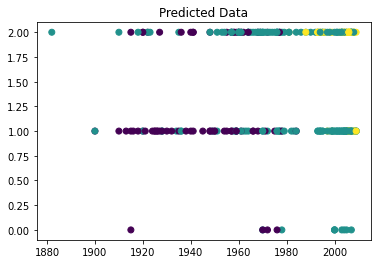

In [58]:
## plot testing data
plt.scatter(X_test.iloc[:,0],y_test,c=y_test)
plt.title('Actual Data')
plt.show()

## plot predicted data
plt.scatter(X_test.iloc[:,0],prediction6_fin,c=y_test)
plt.title('Predicted Data');